# **Stock Price Prediction**

Here's an explanation of each section in of code, point by point:

1. **Import Libraries:**
   - `pandas` (as `pd`): A powerful data manipulation library.
   - `datetime`: A module to work with dates and times.
   - `matplotlib.pyplot` (as `plt`): A plotting library for data visualization.
   - `numpy` (as `np`): A library for numerical operations.
   - `tensorflow.keras.models.Sequential`: A class to build sequential neural network models.
   - `tensorflow.keras.optimizers.Adam`: An optimizer for training neural networks.
   - `tensorflow.keras.layers`: Submodules for different types of layers in Keras.
   - `copy.deepcopy`: A function for deep copying objects.

2. **Load and Extract Data:**
   - Load stock data from a CSV file using `pd.read_csv()`.
   - Extract only the 'Date' and 'Close' columns from the DataFrame.

3. **Convert 'Date' to Datetime:**
   - Define a function `str_to_datetime` to convert date strings to datetime objects.
   - Apply this function to the 'Date' column of the DataFrame to convert it to datetime format.

4. **Set 'Date' as Index:**
   - Set the 'Date' column as the index of the DataFrame. This is often done for time series analysis.

5. **Windowed DataFrame Creation:**
   - Define a function `df_to_windowed_df` that generates a windowed DataFrame for time series analysis.
   - Loop through the dates and create a DataFrame with a specified window size.

6. **Convert Windowed DataFrame to X, y:**
   - Define a function `windowed_df_to_date_X_y` to convert the windowed DataFrame into date arrays, feature matrix (X), and target array (y).

7. **Data Splitting:**
   - Calculate the indices for splitting the data into training, validation, and testing sets based on specified proportions.
   - Split the date arrays (`dates`), feature matrix (`X`), and target array (`y`) into respective subsets.

8. **Model Architecture:**
   - Create a Sequential model using Keras layers.
   - Stack layers: Input layer (`layers.Input`), LSTM layer (`layers.LSTM`), and three Dense layers (`layers.Dense`) with ReLU activation.

9. **Model Compilation:**
   - Compile the model using mean squared error (`'mse'`) as the loss function and the Adam optimizer.
   - Specify `'mean_absolute_error'` as the metric for evaluation during training.

10. **Model Training:**
    - Train the model using `model.fit()` with training data (`X_train`, `y_train`) and validation data (`X_val`, `y_val`).
    - Set the number of training epochs to 100.

11. **Prediction Generation:**
    - Generate predictions for training, validation, and testing sets using the trained model (`model.predict()`).

12. **Recursive Prediction:**
    - Generate recursive predictions for a combined date range of validation and test dates.
    - Iterate through each target date and predict the next value using the trained model and the last window.

13. **Plotting:**
    - Plot training, validation, testing, and recursive predictions along with their corresponding actual values using `matplotlib.pyplot`.
    - Use different line styles and labels for each set of predictions and observations.
    - Display a legend to differentiate between different lines on the plot.

Overall, this code loads stock data, preprocesses it, constructs an LSTM model, trains it, generates predictions, and visualizes the results. It's a comprehensive pipeline for stock price prediction using LSTM neural networks.

### **Model to predict stocks of a company (part by part code)**

In [ ]:
# dataset @https://finance.yahoo.com/quote/MSFT/history

In [89]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-10,288.170013,289.809998,286.940002,289.160004,286.391663,24687800
1,2022-08-11,290.850006,291.209991,286.510010,287.019989,284.272156,20065900
2,2022-08-12,288.480011,291.910004,286.940002,291.910004,289.115356,22619700
3,2022-08-15,291.000000,294.179993,290.109985,293.470001,290.660431,18085700
4,2022-08-16,291.989990,294.040009,290.420013,292.709991,289.907684,18102900
...,...,...,...,...,...,...,...
246,2023-08-03,326.000000,329.880005,325.950012,326.660004,326.660004,18253700
247,2023-08-04,331.880005,335.140015,327.239990,327.779999,327.779999,23727700
248,2023-08-07,328.369995,331.109985,327.519989,330.109985,330.109985,17741500
249,2023-08-08,326.959991,328.750000,323.000000,326.049988,326.049988,22327600


In [90]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-08-10,289.160004
1,2022-08-11,287.019989
2,2022-08-12,291.910004
3,2022-08-15,293.470001
4,2022-08-16,292.709991
...,...,...
246,2023-08-03,326.660004
247,2023-08-04,327.779999
248,2023-08-07,330.109985
249,2023-08-08,326.049988


In [91]:
df['Date']


0      2022-08-10
1      2022-08-11
2      2022-08-12
3      2022-08-15
4      2022-08-16
          ...    
246    2023-08-03
247    2023-08-04
248    2023-08-07
249    2023-08-08
250    2023-08-09
Name: Date, Length: 251, dtype: object

In [92]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-08-10')

datetime_object

datetime.datetime(2022, 8, 10, 0, 0)

In [93]:
df['Date'] = df['Date'].apply(str_to_datetime)

df['Date']

<ipython-input-93-a035e129bcba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-08-10
1     2022-08-11
2     2022-08-12
3     2022-08-15
4     2022-08-16
         ...    
246   2023-08-03
247   2023-08-04
248   2023-08-07
249   2023-08-08
250   2023-08-09
Name: Date, Length: 251, dtype: datetime64[ns]

In [94]:
df.index = df.pop('Date')

df

,Close
Date,
2022-08-10,289.160004
2022-08-11,287.019989
2022-08-12,291.910004
2022-08-15,293.470001
2022-08-16,292.709991
...,...
2023-08-03,326.660004
2023-08-04,327.779999
2023-08-07,330.109985


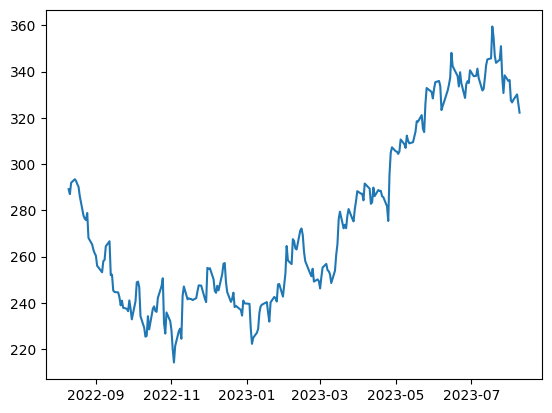

In [95]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [99]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    while target_date <= last_date:
        df_subset = dataframe.loc[:target_date][-(n+1):]
        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
        else:
            values = df_subset['Close'].to_numpy()
            x, y = values[:-1], values[-1]

            dates.append(target_date)
            X.append(x)
            Y.append(y)

        target_date += datetime.timedelta(days=1)

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

windowed_df = df_to_windowed_df(df, '2022-08-10', '2023-08-09', 3)
windowed_df

Error: Window of size 3 is too large for date 2022-08-10 00:00:00
Error: Window of size 3 is too large for date 2022-08-11 00:00:00
Error: Window of size 3 is too large for date 2022-08-12 00:00:00
Error: Window of size 3 is too large for date 2022-08-13 00:00:00
Error: Window of size 3 is too large for date 2022-08-14 00:00:00


,Target Date,Target-3,Target-2,Target-1,Target
0,2022-08-15,289.160004,287.019989,291.910004,293.470001
1,2022-08-16,287.019989,291.910004,293.470001,292.709991
2,2022-08-17,291.910004,293.470001,292.709991,291.320007
3,2022-08-18,293.470001,292.709991,291.320007,290.170013
4,2022-08-19,292.709991,291.320007,290.170013,286.149994
...,...,...,...,...,...
355,2023-08-05,336.339996,327.500000,326.660004,327.779999
356,2023-08-06,336.339996,327.500000,326.660004,327.779999
357,2023-08-07,327.500000,326.660004,327.779999,330.109985
358,2023-08-08,326.660004,327.779999,330.109985,326.049988


In [101]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((360,), (360, 3, 1), (360,))

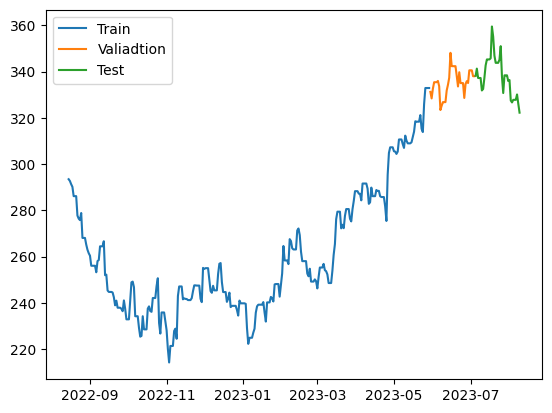

In [70]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Valiadtion', 'Test'])

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)), layers.LSTM(64), layers.Dense(32, activation='relu'), layers.Dense(32, activation='relu'), layers.Dense(1)])

model.compile(loss='mse', optimizer = Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
9/9 [==============================] - 3s 69ms/step - loss: 68396.0000 - mean_absolute_error: 260.1795 - val_loss: 111998.1641 - val_mean_absolute_error: 334.6162
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 68048.5156 - mean_absolute_error: 259.5114 - val_loss: 111579.6406 - val_mean_absolute_error: 333.9902
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 67698.3906 - mean_absolute_error: 258.8361 - val_loss: 111068.7422 - val_mean_absolute_error: 333.2245
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 67267.1875 - mean_absolute_error: 258.0039 - val_loss: 110453.5391 - val_mean_absolute_error: 332.3001
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 66700.2109 - mean_absolute_error: 256.8992 - val_loss: 109540.5859 - val_mean_absolute_error: 330.9235
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 65780.0156 - mean_absolute_error: 255.0980 - val_loss: 1

9/9 [==============================] - 0s 2ms/step


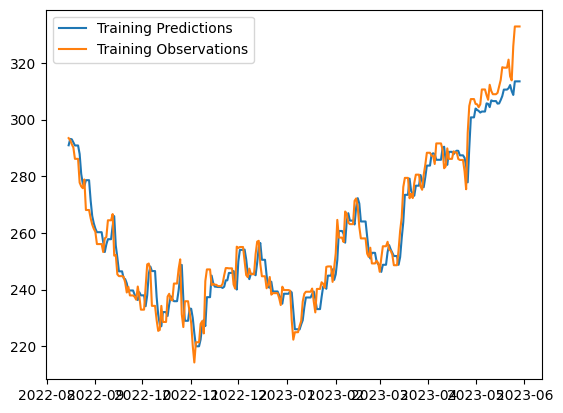

In [73]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 7ms/step


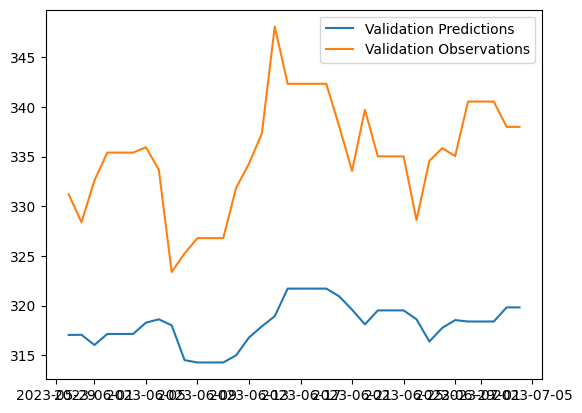

In [74]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


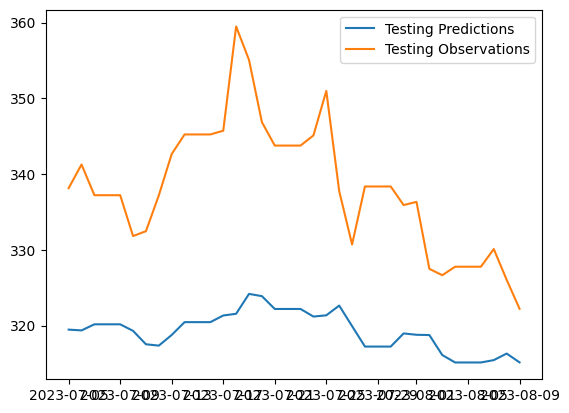

In [75]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

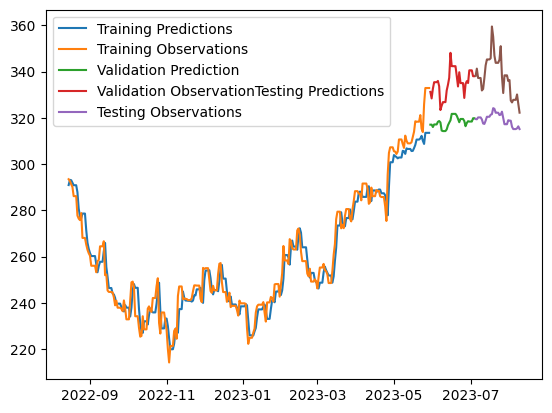

In [76]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations', 'Validation Prediction', 'Validation Observation' 'Testing Predictions', 'Testing Observations'])

In [77]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


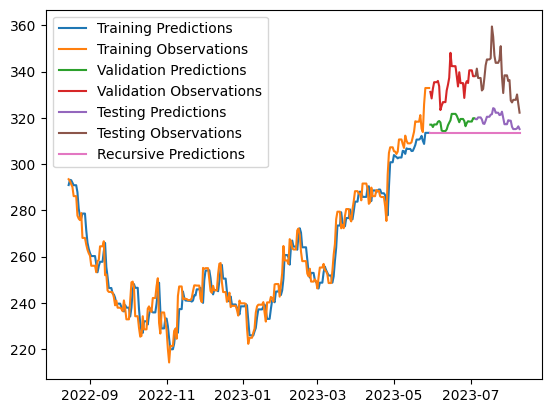

In [78]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

### **Complete code**

Error: Window of size 3 is too large for date 2022-08-10 00:00:00
Error: Window of size 3 is too large for date 2022-08-11 00:00:00
Error: Window of size 3 is too large for date 2022-08-12 00:00:00
Error: Window of size 3 is too large for date 2022-08-13 00:00:00
Error: Window of size 3 is too large for date 2022-08-14 00:00:00
Epoch 1/100
9/9 [==============================] - 2s 58ms/step - loss: 68418.2812 - mean_absolute_error: 260.2247 - val_loss: 111933.8594 - val_mean_absolute_error: 334.5201
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 67956.1328 - mean_absolute_error: 259.3336 - val_loss: 111395.0703 - val_mean_absolute_error: 333.7138
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 67520.1562 - mean_absolute_error: 258.4952 - val_loss: 110747.8203 - val_mean_absolute_error: 332.7426
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 66926.1172 - mean_absolute_error: 257.3425 - val_loss: 109851.4609 - val_mea

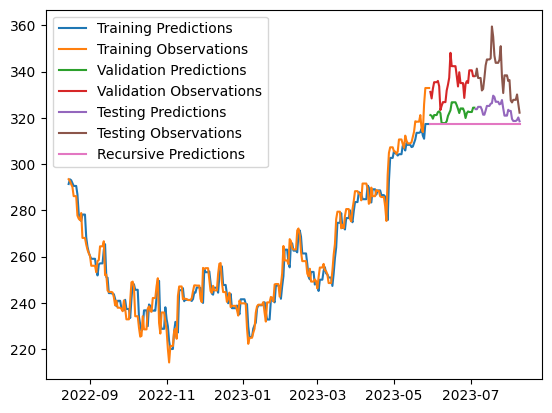

In [104]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from copy import deepcopy

df = pd.read_csv('MSFT.csv')

# df

df = df[['Date', 'Close']]

# df

df[['Date']]

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-08-10')

# datetime_object

df['Date'] = df['Date'].apply(str_to_datetime)

# df['Date']

df.index = df.pop('Date')

# df

# plt.plot(df.index, df['Close'])

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    while target_date <= last_date:
        df_subset = dataframe.loc[:target_date][-(n+1):]

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
        else:
            values = df_subset['Close'].to_numpy()
            x, y = values[:-1], values[-1]

            dates.append(target_date)
            X.append(x)
            Y.append(y)

        target_date += datetime.timedelta(days=1)

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

windowed_df = df_to_windowed_df(df, '2022-08-10', '2023-08-09', 3)
# windowed_df

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
# dates.shape, X.shape, y.shape

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# plt.plot(dates_train, y_train)
# plt.plot(dates_val, y_val)
# plt.plot(dates_test, y_test)

# plt.legend(['Train', 'Valiadtion', 'Test'])

model = Sequential([layers.Input((3,1)), layers.LSTM(64), layers.Dense(32, activation='relu'), layers.Dense(32, activation='relu'), layers.Dense(1)])

model.compile(loss='mse', optimizer = Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])


# **Complete Code (with explanation)**

Error: Window of size 3 is too large for date 2022-08-10 00:00:00
Error: Window of size 3 is too large for date 2022-08-11 00:00:00
Error: Window of size 3 is too large for date 2022-08-12 00:00:00
Error: Window of size 3 is too large for date 2022-08-13 00:00:00
Error: Window of size 3 is too large for date 2022-08-14 00:00:00
Epoch 1/100
9/9 [==============================] - 2s 61ms/step - loss: 68513.5703 - mean_absolute_error: 260.4081 - val_loss: 112285.5156 - val_mean_absolute_error: 335.0453
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 68326.7188 - mean_absolute_error: 260.0474 - val_loss: 112027.0391 - val_mean_absolute_error: 334.6593
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 68117.5000 - mean_absolute_error: 259.6457 - val_loss: 111730.8438 - val_mean_absolute_error: 334.2165
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 67858.1484 - mean_absolute_error: 259.1464 - val_loss: 111365.2656 - val_mea

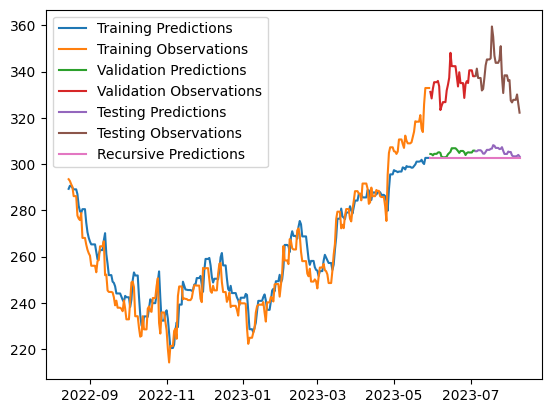

In [109]:
# Import necessary libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from copy import deepcopy

# Load the CSV data into a DataFrame
df = pd.read_csv('MSFT.csv')

# Extract 'Date' and 'Close' columns from the DataFrame
df = df[['Date', 'Close']]

# Convert 'Date' column to datetime objects
df['Date'] = df['Date'].apply(str_to_datetime)

# Set 'Date' column as the index
df.index = df.pop('Date')

# Define a function to convert DataFrame into a windowed format
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
    # ... (code for creating windowed_df)
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    while target_date <= last_date:
        df_subset = dataframe.loc[:target_date][-(n+1):]

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
        else:
            values = df_subset['Close'].to_numpy()
            x, y = values[:-1], values[-1]

            dates.append(target_date)
            X.append(x)
            Y.append(y)

        target_date += datetime.timedelta(days=1)

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Create the windowed DataFrame
windowed_df = df_to_windowed_df(df, '2022-08-10', '2023-08-09', 3)

# Define a function to convert windowed DataFrame to numpy arrays
def windowed_df_to_date_X_y(windowed_dataframe):
    # ... (code for converting to dates, X, and y)
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

# Convert the windowed DataFrame to numpy arrays
dates, X, y = windowed_df_to_date_X_y(windowed_df)

# Calculate indices to split data into training, validation, and testing sets
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Split the data into training, validation, and testing sets
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Define the architecture and compile the LSTM model
model = Sequential([layers.Input((3,1)), layers.LSTM(64), layers.Dense(32, activation='relu'), layers.Dense(32, activation='relu'), layers.Dense(1)])
model.compile(loss='mse', optimizer = Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# Train the model using the training data and validate using validation data
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

# Generate predictions using the trained model
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

# Generate recursive predictions using the trained model
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
for target_date in recursive_dates:
    # ... (code for generating recursive predictions)
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

# Plot the results
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions', 'Validation Observations', 'Testing Predictions', 'Testing Observations', 'Recursive Predictions'])
